# 0. 패키지 불러오기 

In [3]:
# 데이터 구성 : Series, DataFrame 
import pandas as pd

# 행렬 연산 
import numpy as np

# 데이터 시각화 
import matplotlib.pyplot as plt 
import seaborn as sns

# 회귀 분석 
from statsmodels.formula.api import ols

# qqplot, 회귀분석의 상수항 추가 
from statsmodels.api import qqplot, add_constant

# 선형 모델 formula(y ~ X1+X2+ ...)
import statsmodels.formula.api as smf

# 평가 함수
from statsmodels.tools.eval_measures import rmse

# jupyter 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# 한글 폰트 적용 
import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

# 1. 데이터 불러오기 

In [6]:
df_raw=pd.read_csv("/home/piai/바탕화면/강연주/과제/3/부품수리시간.csv", engine='python')
df

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


In [7]:
#  요약 통계량 
df_raw.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


# 2. 변수의 경향성 파악 

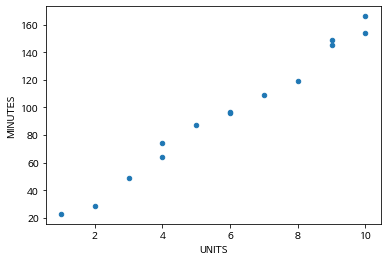

In [8]:
# 목표 변수와 설명 변수의 산점도 
df.plot.scatter(x='UNITS', y='MINUTES')

In [9]:
# 목표 변수와 설명 변수의 상관 관계
df.corr(method='pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


# 3. 회귀 모델 생성 

In [10]:
reg_model=smf.ols(formula='MINUTES~UNITS', data=df_raw)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           8.92e-13
Time:                        22:47:26   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

/home/piai/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### 분석 자료 수 : 14 
#### 잔차 자유도 : 12 = 14-1-1
#### 회귀의 자유도 : 1 

#### Prob(F-statistic) <0.05 회귀모델로서 유의

#### 설명력(R-squared) : 98.7% 

#### 회귀 계수 검정 : 
#### 절편의 유의성은 검토하지 않음  : 회귀식에는 절편의 유의성 상관없이 절편 포함
#### UNITS의 p 값이 0.05보다 작으므로 유의 

# 4. 오차의 기본 가정 검토

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


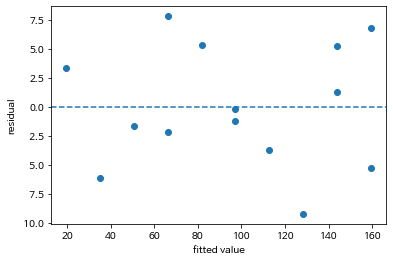

In [11]:
# 잔차의 등분산성 : X-예측값, Y-잔차 
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle='--')

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


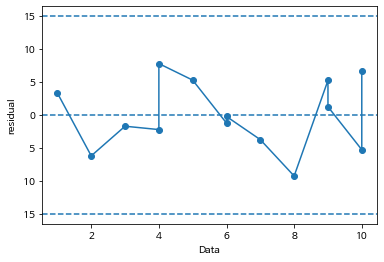

In [12]:
# 잔차의 독립성 
plt.plot(df['UNITS'],reg_result.resid, marker='o')
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--")
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="--")

#### y=0을 기준으로 랜덤하게 분포하므로 등분산성과 독립성 만족 

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


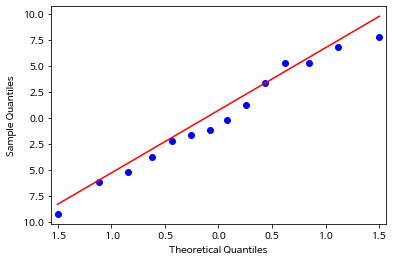

In [13]:
# 잔차의 정규성 검정 : Q-Q ploy     
qqplot(reg_result.resid,line='q')
plt.show()

In [15]:
# 잔차의 옴니버스의 정규성 검정 
from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid,axis=0)

/home/piai/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=0.746448218273468, pvalue=0.6885109139659057)

#### 정규분포 직선을 중심으로 분포하고 p-value가 0.05보다 크므로 귀무가설을 채택하여 정규분포를 따름 

#### 최종 회귀식 :y=4.16+15.51*Units